In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(
   n_samples=100, n_features=2,
   centers=3, cluster_std=0.7,
   shuffle=True, random_state=0
)

print(y.shape)
print(X.shape)

(100,)
(100, 2)


In [3]:
class KMeans():
    def __init__(self, k=2, stopping_condition=0.001, max_iterations=100):
        self.k = k
        self.stopping_condition = stopping_condition
        self.max_iterations = max_iterations

    def initialise_centroids(self, X):
        centroids = []
        for i in range(self.k):
            centroids.append([np.random.uniform(np.min(feature),  np.max(feature)) for feature in X])
        return centroids

    def calc_euclid_distance(self, x, centroid):
        return np.sqrt(np.sum((x - centroid) ** 2))

    def get_closest_centroid(self, X, centroids):
        closest_centroid = []
        for x in X.T:
            distance_list = [self.calc_euclid_distance(x, centroid) for centroid in centroids]
            closest_centroid.append(np.argmin(distance_list))
        return np.array(closest_centroid)

    def update_centroids(self, X, centroid_labels):
        centroids = []
        for i in range(self.k):
            centroids.append([ np.mean(feature[centroid_labels == i])  for feature in X])
        return centroids

    def centroid_movements(self, old_centroid, new_centroid):
        total_movement = 0
        for i in range(len(old_centroid)):
            total_movement += self.calc_euclid_distance(np.array(old_centroid[i]), np.array(new_centroid[i]))
        return total_movement

    def main(self, X):

        # initialise centroids - unfirom between min and max of each feature
        centroids = self.initialise_centroids(X)

        # loop through iterations
        for it in range(1, self.max_iterations):
            centroid_labels = self.get_closest_centroid(X, centroids)
            old_centroids = centroids
            centroids = self.update_centroids(X, centroid_labels)
            if self.centroid_movements(old_centroids, centroids) < self.stopping_condition:
                print(f"Stopping at iteration {it}")
                break

        return centroid_labels


In [4]:
# get k value
k = len(np.unique(y))
KM = KMeans(k=k, max_iterations=100)
labels = KM.main(X.T)

Stopping at iteration 5


<Axes: >

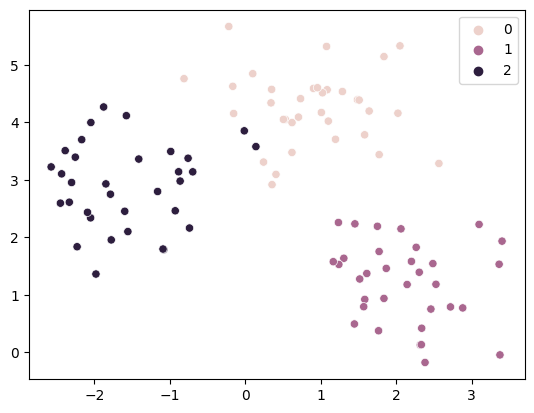

In [5]:
# true scatter plots
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y.reshape(-1))

<Axes: >

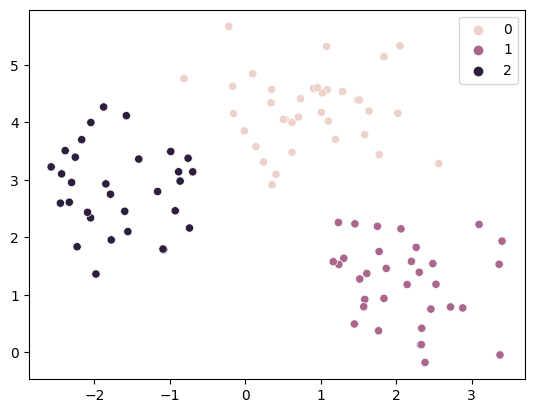

In [6]:
# predicted plots
sns.scatterplot(x=X[:,0], y=X[:,1],hue=labels)